# DATASET: California housing dataset
Dataset from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In this repo this dataset will be used to modeling regression models

OBS: each feature is independient but in some a analysis generated to evaluate the model, some of them consering that each feature is correlated in the time

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/offline-validation-ml-regression


## Generate the data, basic codes to cleaning the data and split into train/test. Generate data already to modeling

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 1. load data

In [3]:
data_X, data_y = fetch_california_housing(return_X_y=True, as_frame=True)

# joinn and rename dataset
data = data_X.copy()
data['Price'] = data_y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Drop duplicates

In [4]:
data.shape

(20640, 9)

In [5]:
# dropduplicates - some kind of plots in plotly return error with duplicated values
data = data.drop_duplicates()
data.shape

(20640, 9)

### 3. Histograms

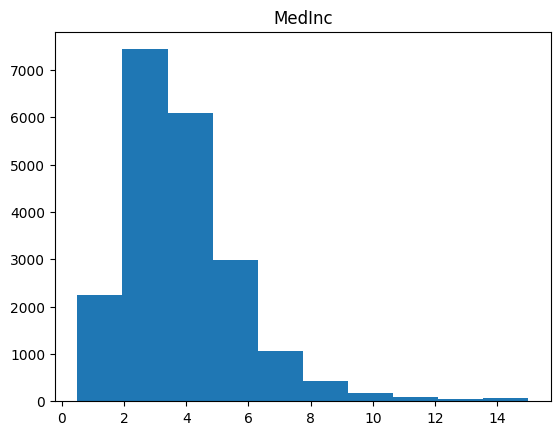

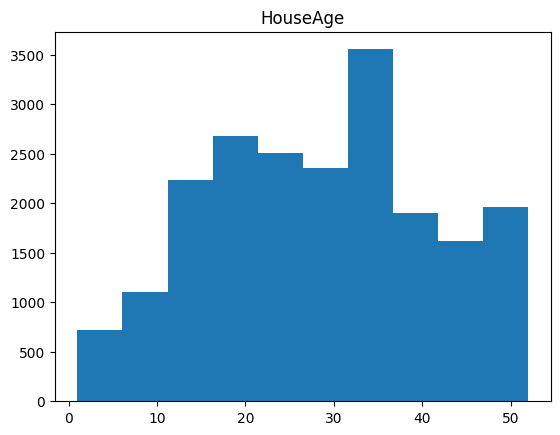

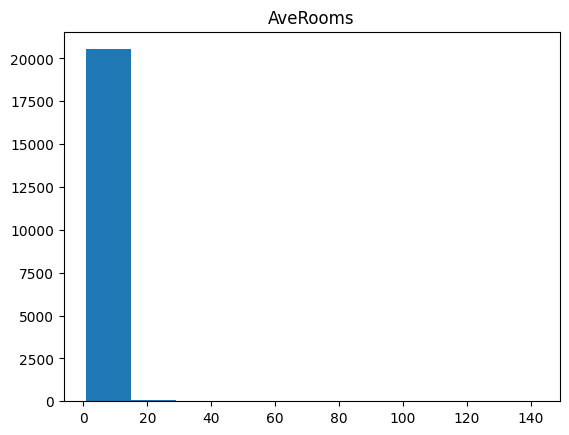

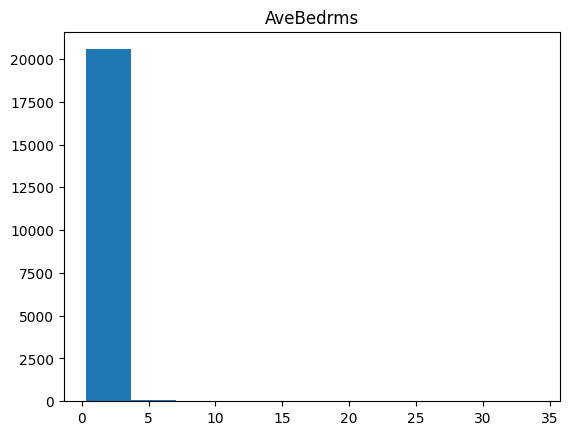

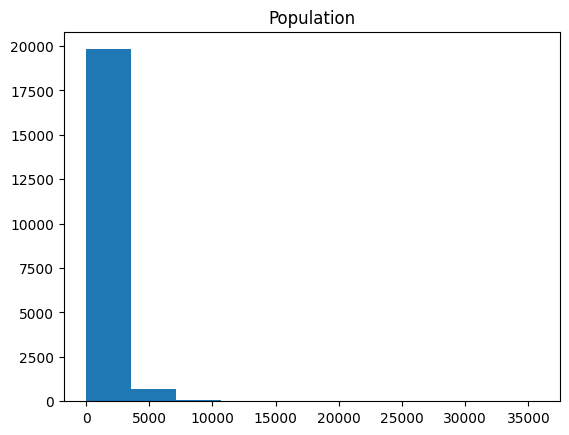

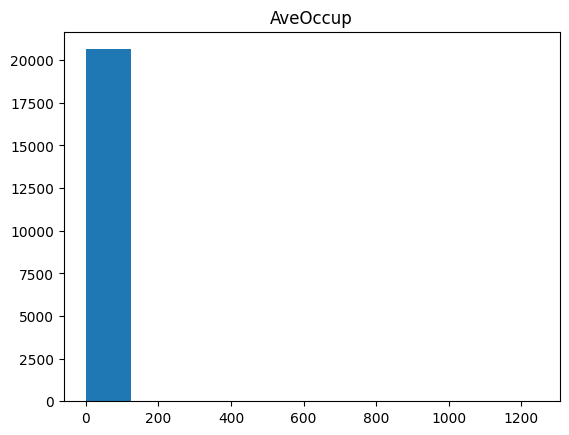

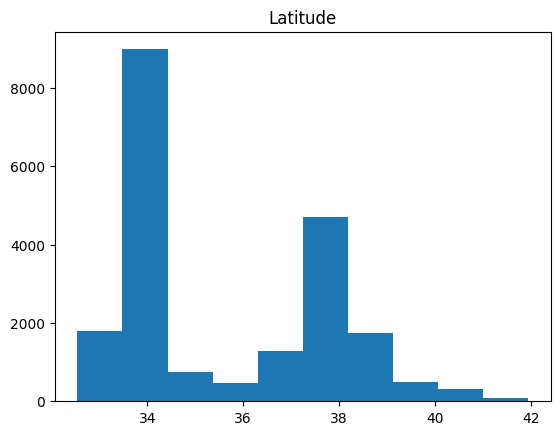

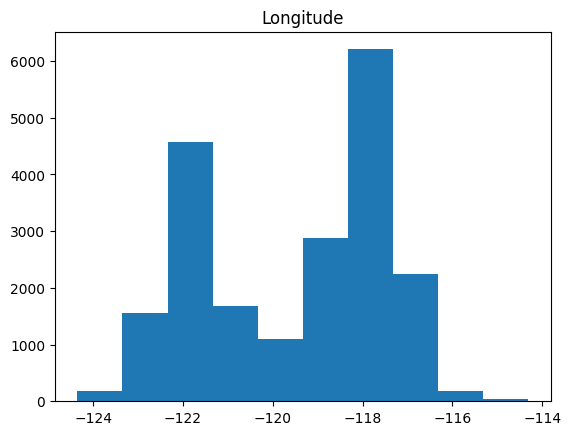

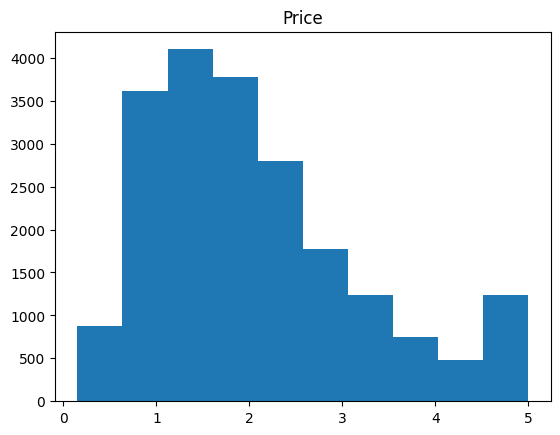

In [6]:
for i in data.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(data[i])

### 4. drop outliers

In [7]:
#!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [8]:
# describe percentiles
data.describe(percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
1%,1.069631,4.000000,2.581133,0.872840,88.000000,1.536686,32.680000,-123.220000,0.500000
5%,1.600570,8.000000,3.432330,0.939109,348.000000,1.872545,32.820000,-122.470000,0.662000
10%,1.903800,13.000000,3.790884,0.966415,510.000000,2.075630,33.630000,-122.290000,0.823000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250


In [9]:
# y data profiling
profile = ProfileReport(data, title="Profiling Report.html", minimal = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
### DELETE DATA BELOW PERCENTILE 1 AND ABOVE PERCENITLE 99 - ALL FEATURES

# Calculate percentile
percentil_lower = data.quantile(0.01)
percentil_upper = data.quantile(0.99)

# Filter data
data_filtered = data[(data >= percentil_lower) & (data <= percentil_upper)]
data_filtered.dropna(inplace = True)

In [11]:
data_filtered

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
data_filtered.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,18176.000000,18176.000000,18176.000000,18176.000000,18176.000000,18176.000000,18176.000000,18176.000000,18176.000000
mean,3.880834,29.046270,5.302667,1.062360,1392.849912,2.900426,35.607544,-119.594924,2.099452
std,1.659458,12.356725,1.143042,0.104937,853.573853,0.677936,2.046870,1.929404,1.115796
min,1.071400,4.000000,2.581333,0.873016,88.000000,1.536814,32.680000,-123.220000,0.500000
25%,2.653400,19.000000,4.489425,1.005880,820.000000,2.436085,33.940000,-121.790000,1.258000
50%,3.601600,29.000000,5.238348,1.046685,1187.000000,2.818875,34.260000,-118.510000,1.847000
75%,4.787275,37.000000,6.013341,1.094463,1726.000000,3.263174,37.700000,-118.040000,2.672000
max,10.594100,52.000000,10.352941,2.127208,5804.000000,5.392954,40.620000,-116.290000,5.000010


In [13]:
data_filtered.shape

(18176, 9)

In [14]:
#### review prolifing - GOAL: DELETE EXTREME VALUES IN FEAUTURES DATA SKEWED

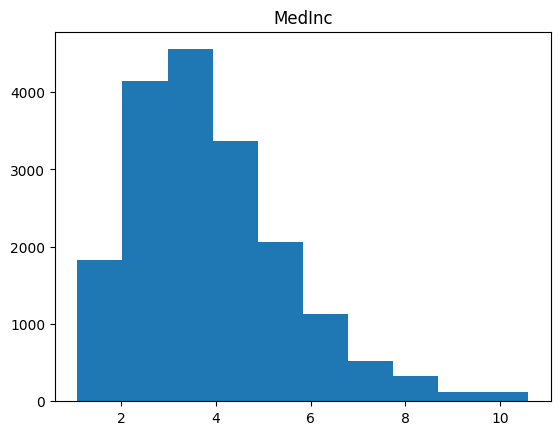

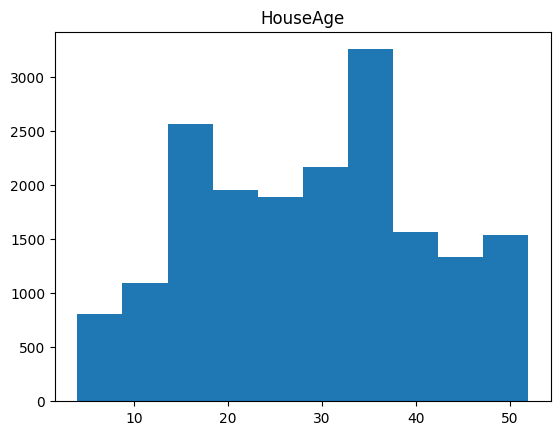

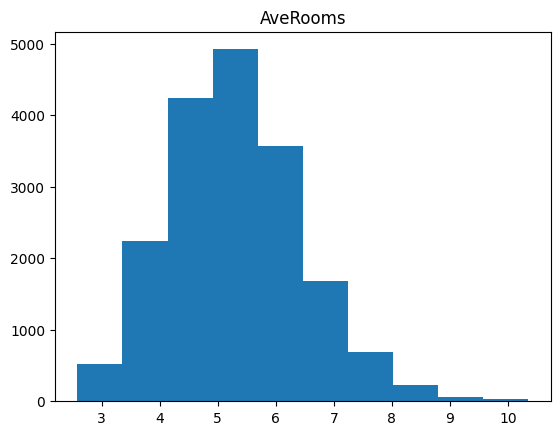

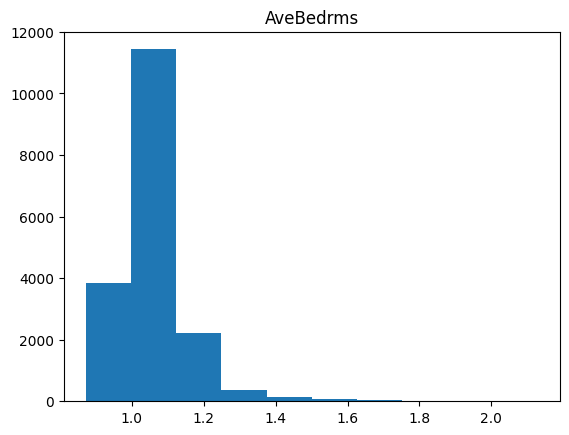

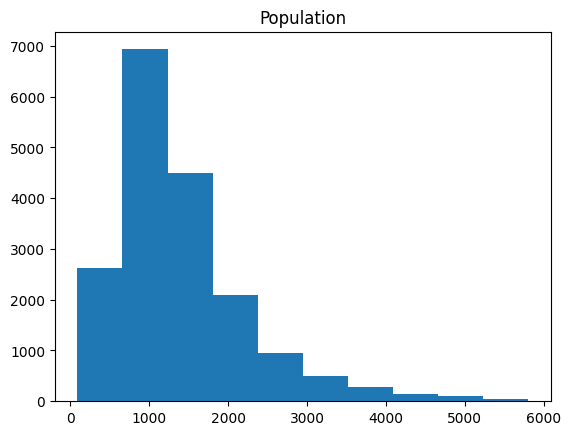

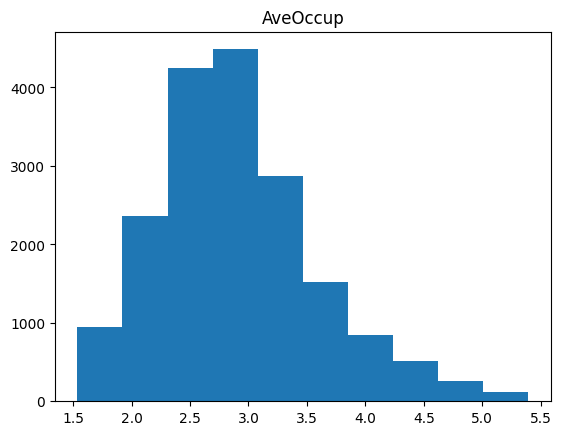

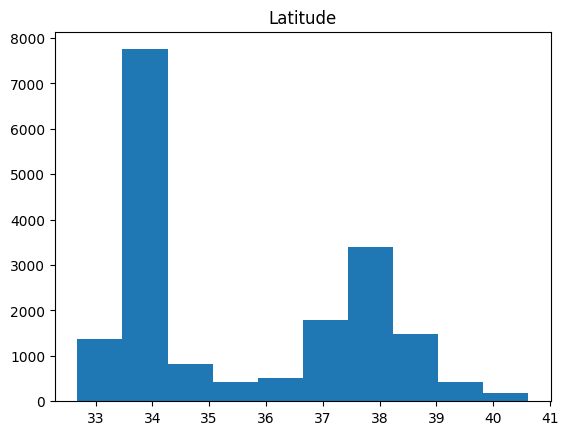

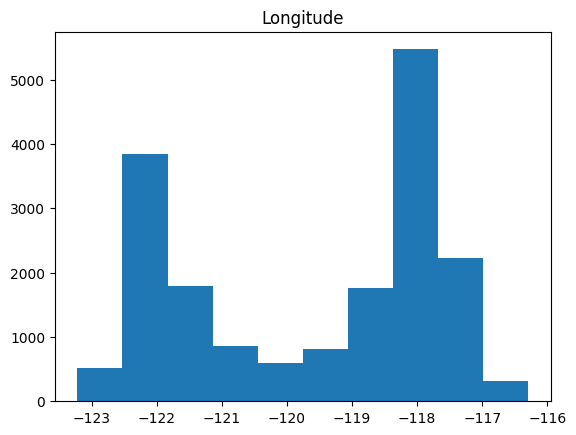

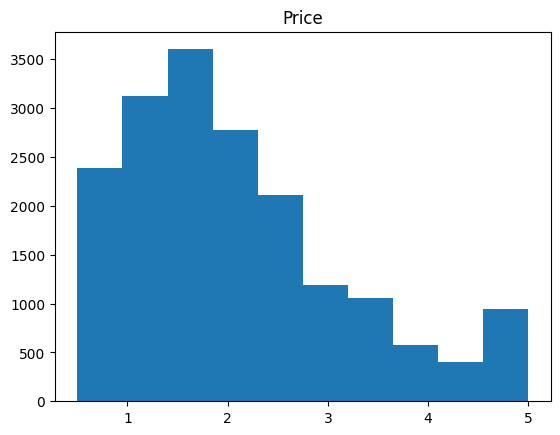

In [15]:
for i in data_filtered.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(data_filtered[i])

In [16]:
# profile_filtered = ProfileReport(data, title="Profiling Report.html")
# profile_filtered

### 5. Save data filtered as data_raw

In [17]:
data_raw = data_filtered.copy()
data_raw.to_pickle('artifacts/data/data_raw.pkl')

### 6. Split into train-test

In [18]:
# features - target
target = 'Price'
list_features = list(set(data_raw.columns) - set([target]))
list_features

['Population',
 'MedInc',
 'AveRooms',
 'Latitude',
 'Longitude',
 'HouseAge',
 'AveOccup',
 'AveBedrms']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_raw[list_features], 
                                                    data_raw[[target]], 
                                                    test_size = 0.2, 
                                                    random_state=42
                                                   )

In [20]:
X_train.head(3)

,Population,MedInc,AveRooms,Latitude,Longitude,HouseAge,AveOccup,AveBedrms
5712,926.0,4.1523,4.641509,34.22,-118.24,34.0,2.495957,1.094340
15731,1588.0,3.3882,3.771250,37.78,-122.44,52.0,1.985000,1.063750
2894,743.0,1.7292,4.135135,35.37,-118.99,38.0,3.346847,0.990991


In [21]:
y_train.head(3)

,Price
5712,2.520
15731,4.714
2894,0.581


### 7. Save train test

In [22]:
X_train.to_pickle('artifacts/data/X_train.pkl')
X_test.to_pickle('artifacts/data/X_test.pkl')
y_train.to_pickle('artifacts/data/y_train.pkl')
y_test.to_pickle('artifacts/data/y_test.pkl')